# California House Price

## About Dataset

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional r requirements for it.

## Problem Objective:
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

## Field and Description

longitude (signed numeric - float) : Longitude value for the block in California, USA

latitude (numeric - float ) : Latitude value for the block in California, USA

housing_median_age (numeric - int ) : Median age of the house in the block

total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block

total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block

population (numeric - int ) : Count of the total number of population in the block

households (numeric - int ) : Count of the total number of households in the block

median_income (numeric - float ) : Median of the total household income of all the houses in the block

ocean_proximity (numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]

median_house_value (numeric - int ) : Median of the household prices of all the houses in the block

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV,BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [2]:
df= pd.read_csv("data/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Preparation and Visualisation

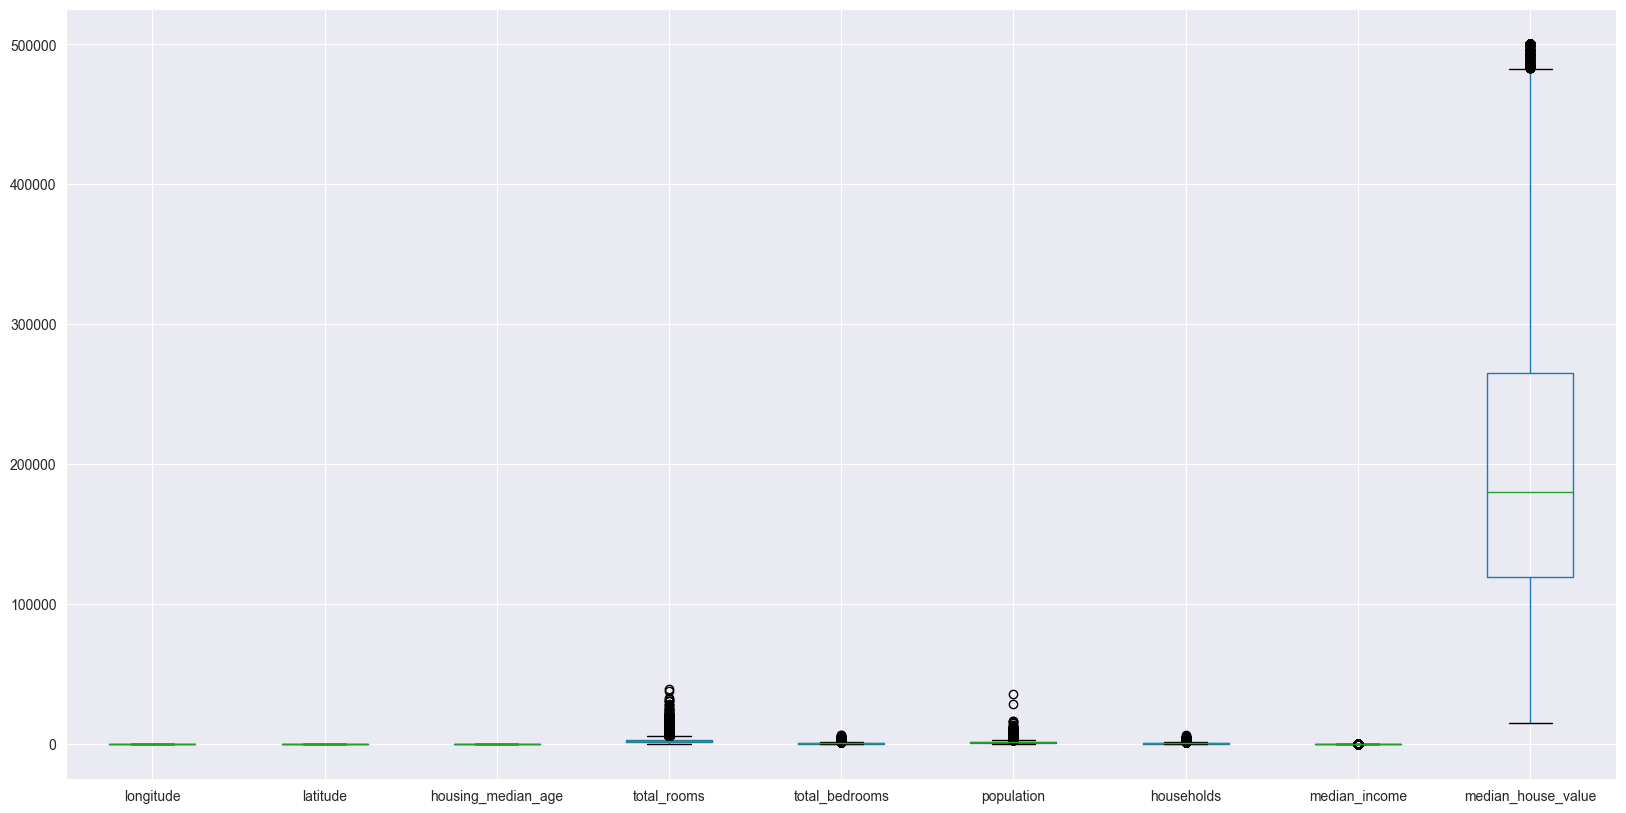

In [6]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

<Axes: ylabel='Frequency'>

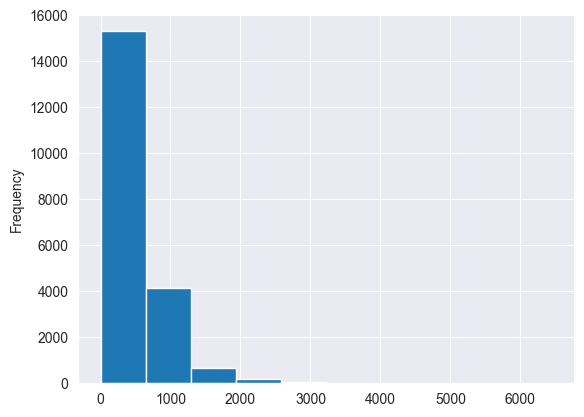

In [7]:
df['total_bedrooms'].plot.hist()

In [8]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [9]:
def scaler_transform(dt:pd.DataFrame,col:list):
  for c in col:
    scaler = MinMaxScaler()
    dt[c] = scaler.fit_transform(dt[[c]])

  return dt

In [10]:
df = scaler_transform(df,['longitude','latitude','total_bedrooms','total_rooms','housing_median_age','population','households','median_income'])

In [12]:
scaler1 = MinMaxScaler()
df['median_house_value'] = scaler1.fit_transform(df[['median_income']])

In [13]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,NEAR BAY,0.539668
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,NEAR BAY,0.538027
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,NEAR BAY,0.466028
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,NEAR BAY,0.354699
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,NEAR BAY,0.230776
...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,INLAND,0.073130
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,INLAND,0.141853
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,INLAND,0.082764
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,INLAND,0.094295


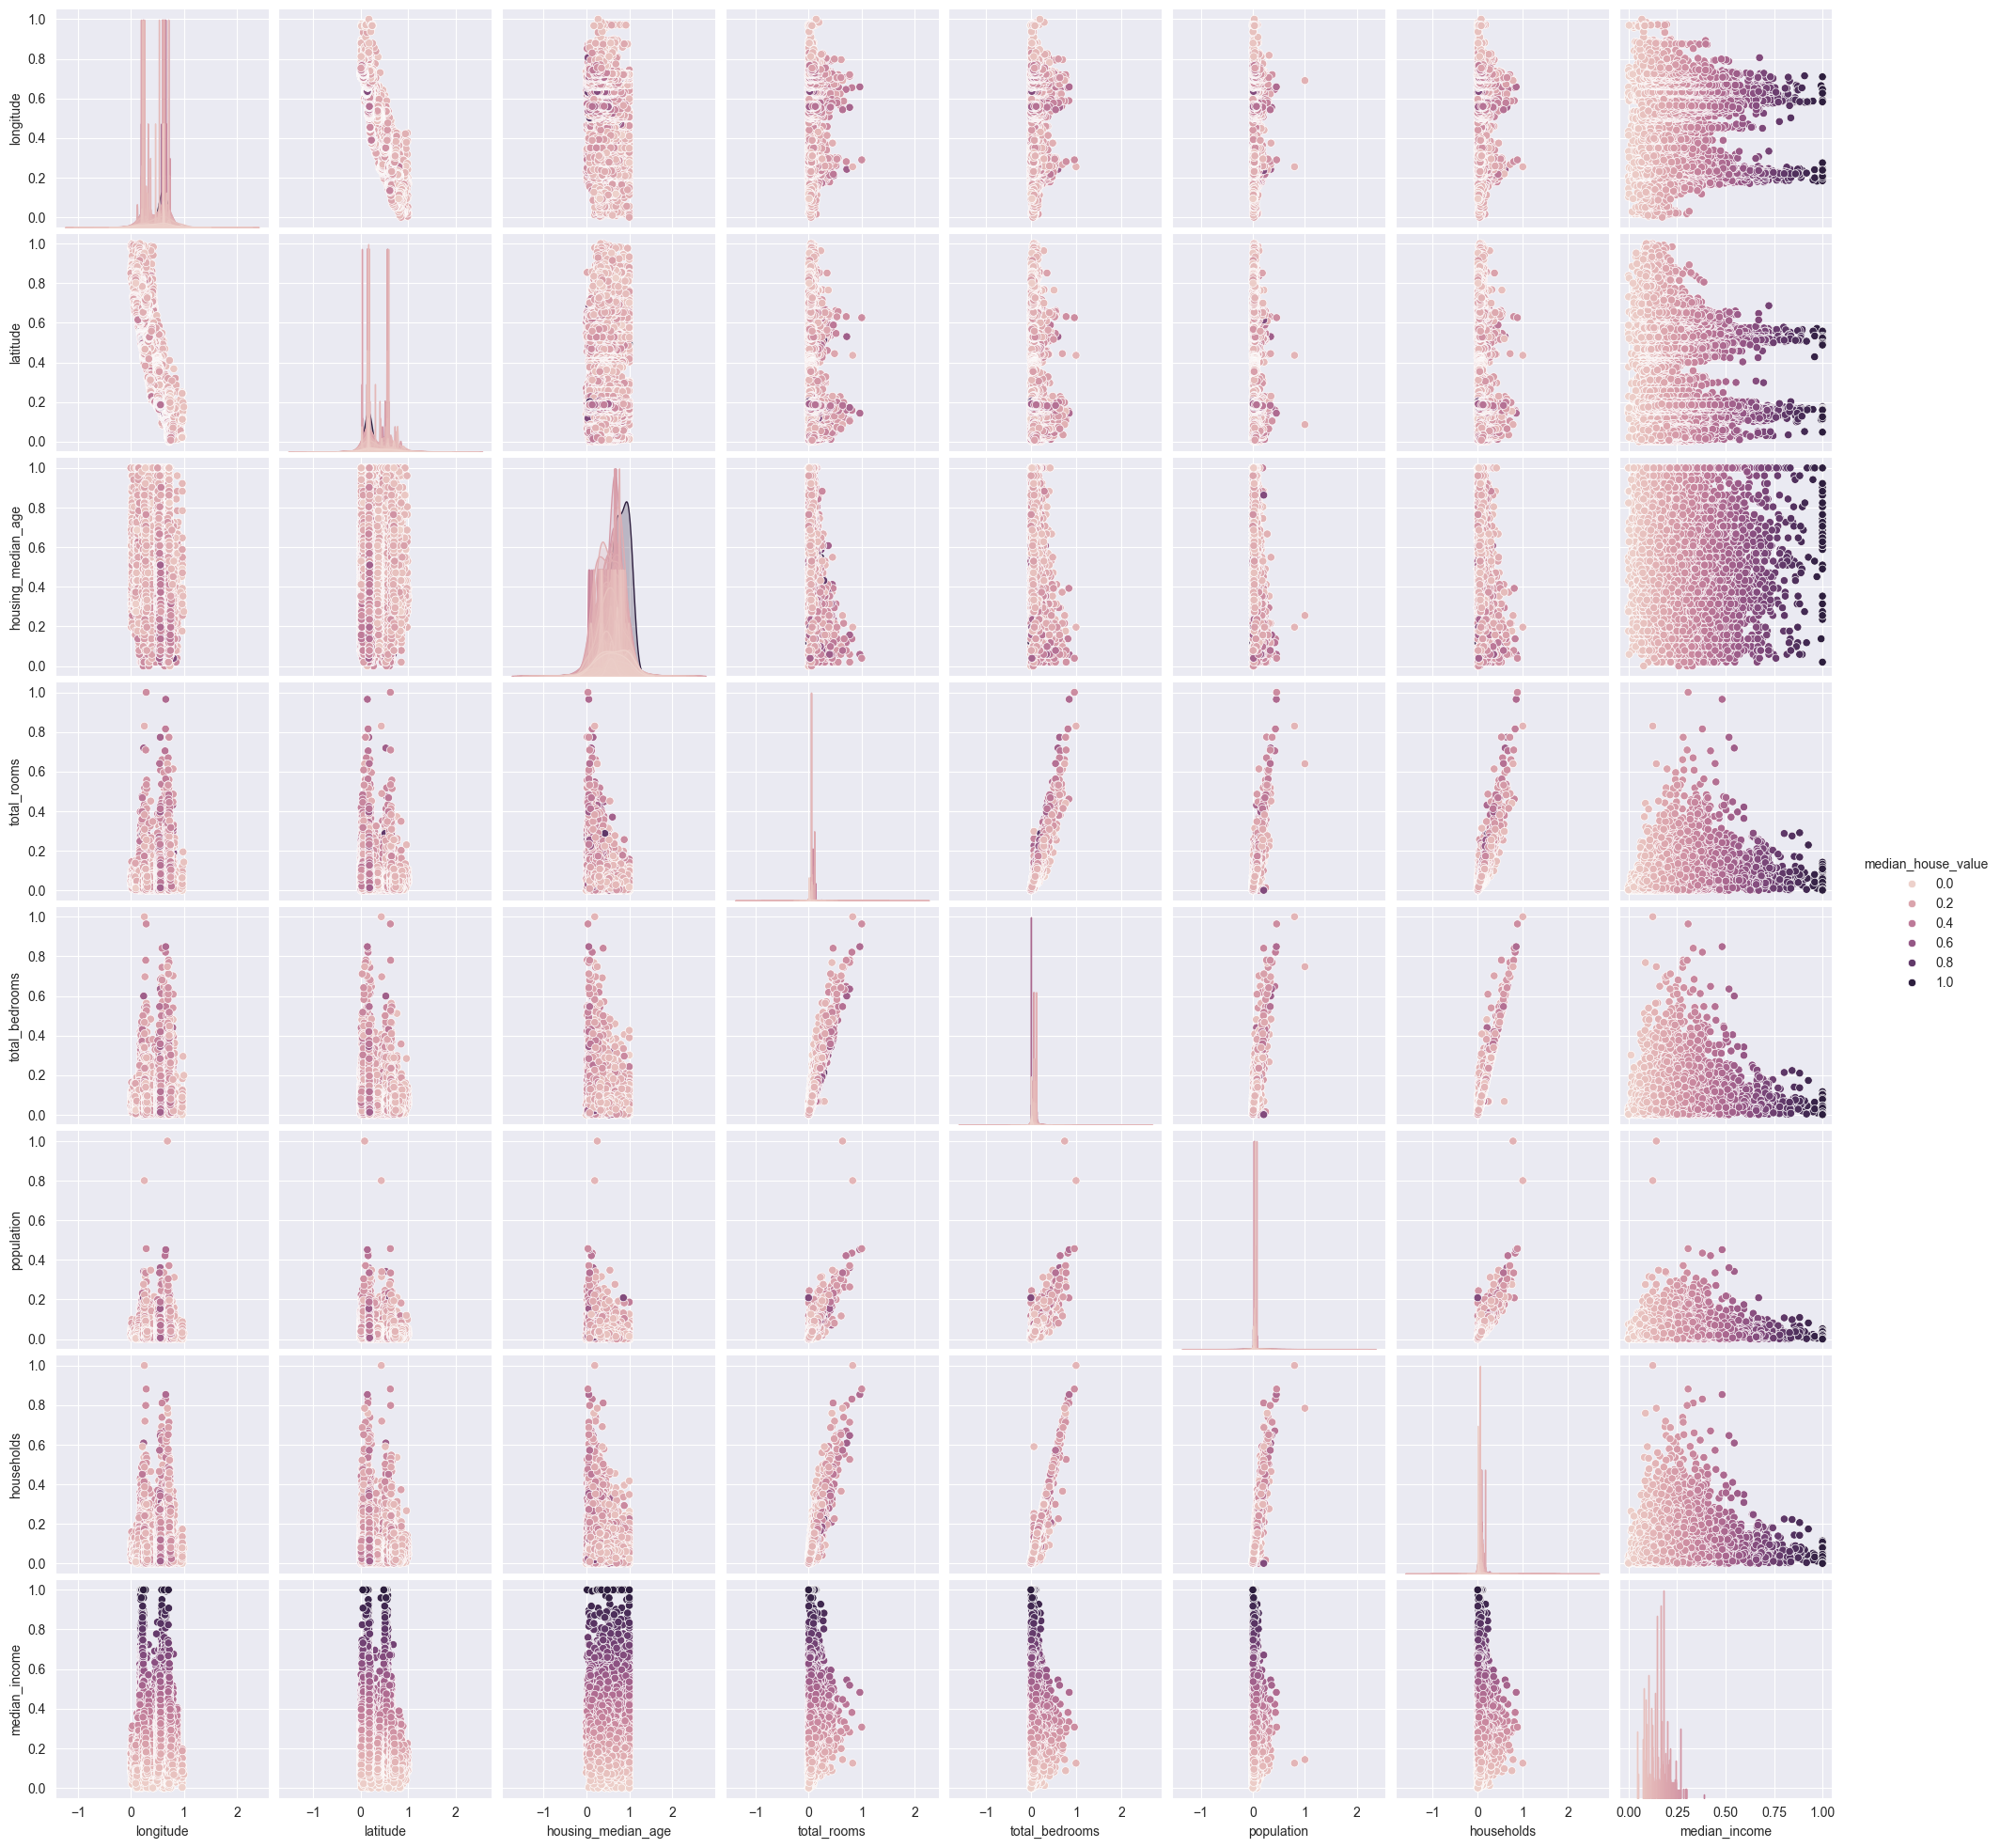

In [14]:
sns.pairplot(df,hue='median_house_value',diag_kind='kde')

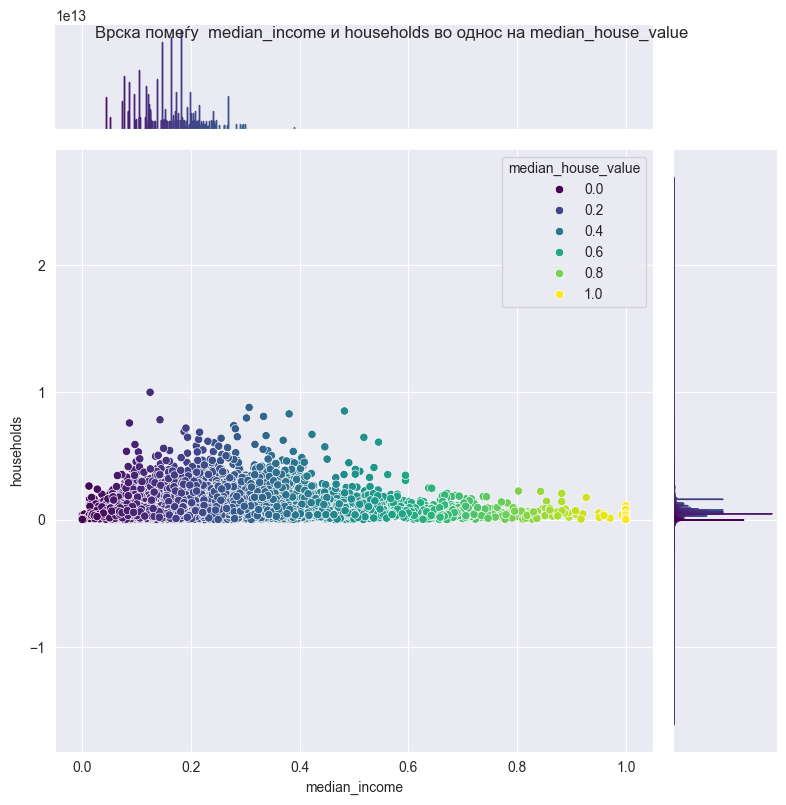

In [15]:
sns.jointplot(x='median_income', y='households', data=df, hue='median_house_value',
              palette='viridis', height=8)
plt.suptitle('Врска помеѓу  median_income и households во однос на median_house_value')
plt.show()

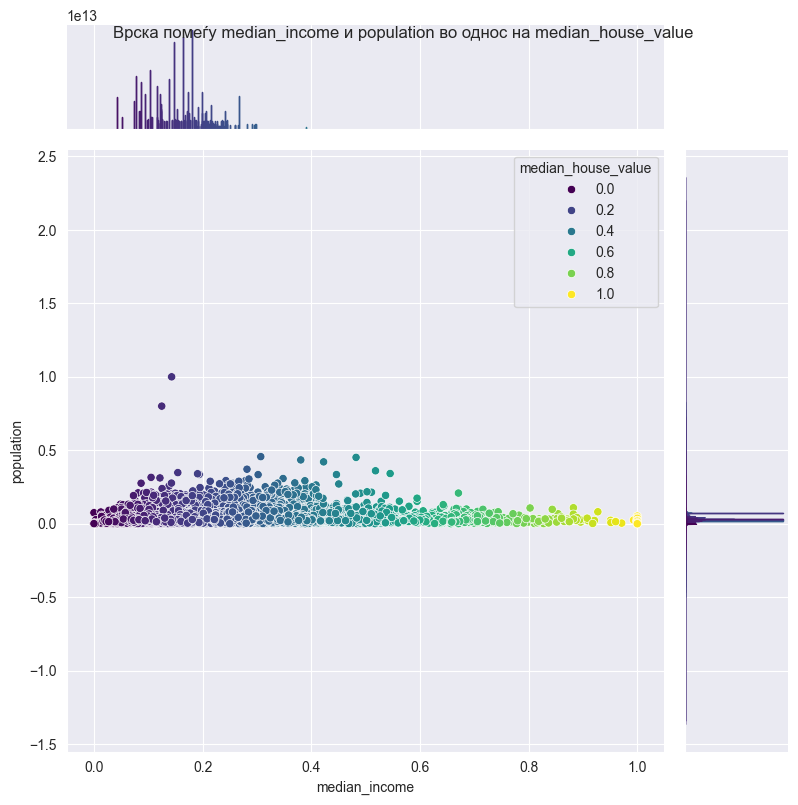

In [16]:
sns.jointplot(x='median_income', y='population', data=df, hue='median_house_value',
              palette='viridis', height=8)
plt.suptitle('Врска помеѓу median_income и population во однос на median_house_value')
plt.show()

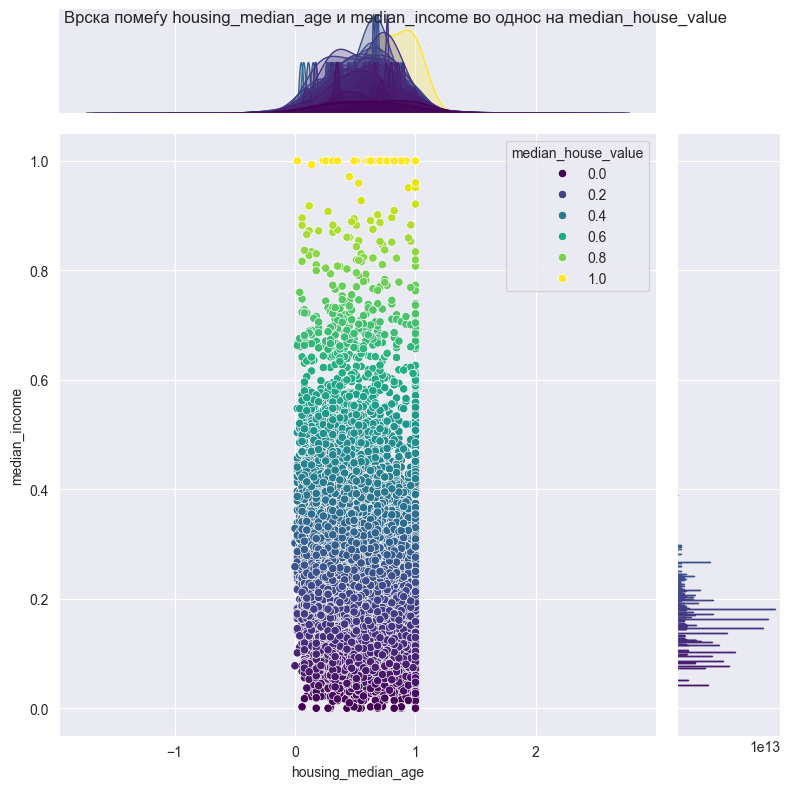

In [17]:
sns.jointplot(x='housing_median_age', y='median_income', data=df, hue='median_house_value',
              palette='viridis', height=8)
plt.suptitle('Врска помеѓу housing_median_age и median_income во однос на median_house_value')
plt.show()

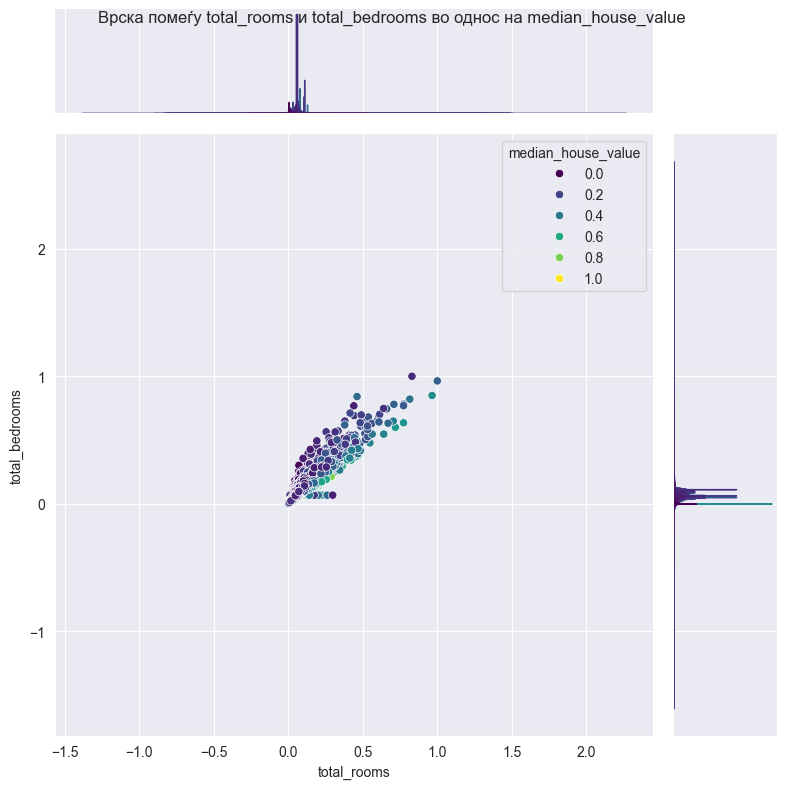

In [18]:
sns.jointplot(x='total_rooms', y='total_bedrooms', data=df, hue='median_house_value',
              palette='viridis', height=8)
plt.suptitle('Врска помеѓу total_rooms и total_bedrooms во однос на median_house_value')
plt.show()

<Axes: >

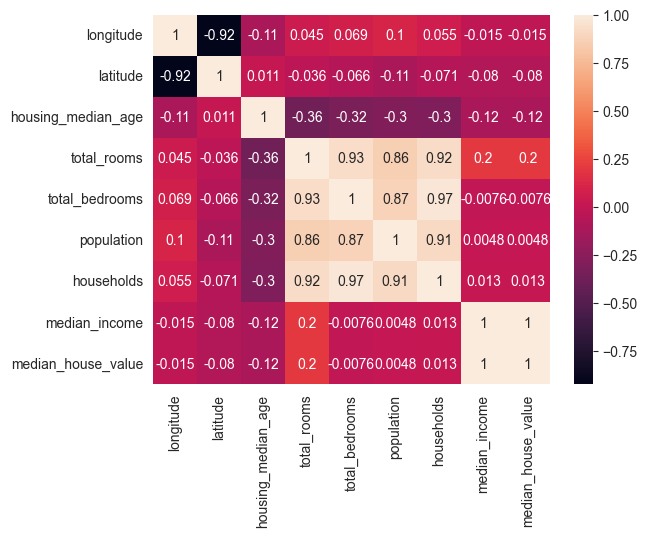

In [19]:
sns.heatmap(df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']].corr(),annot=True)

In [20]:
def label_encoder(dt:pd.DataFrame,col:list):
  for c in col:
    encoder = LabelEncoder()
    dt[c] = encoder.fit_transform(dt[c].astype(str))

  return dt


In [21]:
df = label_encoder(df,['ocean_proximity'])

## Train the model

In [22]:
X,y = df.drop(columns='median_house_value',axis=1),df['median_house_value']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
print(f"y_test shape: {y_test.shape}")

y_test shape: (4128,)


In [31]:
y_test = y_test.ravel()

## Linear Regression

In [33]:
model = LinearRegression()
model.fit(X_train,y_train)
print('Koeficienti',model.coef_)
print('Intercepts:',model.intercept_)

Koeficienti [ 6.43029085e-16  6.72205347e-16  2.41072353e-16 -2.94852847e-15
  1.58643172e-15  9.81701021e-16 -1.38679622e-16  1.00000000e+00
  6.11490025e-17]
Intercepts: -7.494005416219807e-16


In [36]:
pred = model.predict(X_test)
prediction = scaler1.inverse_transform(pred.reshape(-1,1))
y_test = scaler1.inverse_transform(y_test.reshape(-1,1))
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'R2 score: {r2_score(y_test,pred)}')

MSE: 1.7575156601827966e-32
R2 score: 1.0


## Lasso Regression

In [37]:
model = LassoCV()
model.fit(X_train,y_train)
print('Koeficienti',model.coef_)
print('Intercepts:',model.intercept_)
print('Learning rate',model.alpha_)

Koeficienti [-0.    -0.    -0.     0.    -0.     0.     0.     0.999 -0.   ]
Intercepts: 0.00023244128569355205
Learning rate 1.7121981876712227e-05


In [38]:
pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'R2 score: {r2_score(y_test,pred)}')

MSE: 1.733961673219909e-08
R2 score: 0.9999989999992718


## Ridge Regression

In [39]:
model = RidgeCV()
model.fit(X_train,y_train)
print('Koeficienti',model.coef_)
print('Intercepts:',model.intercept_)
print('Learning rate',model.alpha_)

Koeficienti [-3.15909474e-04 -2.98284419e-04 -3.51772323e-05  2.15604831e-03
 -1.41184061e-03 -8.48928118e-04  1.65321733e-05  9.99403257e-01
 -4.32666980e-06]
Intercepts: 0.0004167286552302363
Learning rate 0.1


In [40]:
pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'R2 score: {r2_score(y_test,pred)}')

MSE: 3.6755740615433365e-09
R2 score: 0.9999997880243379


## Elastic Net

In [41]:
model = ElasticNetCV()
model.fit(X_train,y_train)
print('Koeficienti',model.coef_)
print('Intercepts:',model.intercept_)
print('Learning rate',model.alpha_)

Koeficienti [-0.       -0.       -0.        0.       -0.        0.        0.
  0.998002 -0.      ]
Intercepts: 0.00046441815323391977
Learning rate 3.4243963753424455e-05


In [42]:
pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'R2 score: {r2_score(y_test,pred)}')

MSE: 6.921995779326827e-08
R2 score: 0.999996007985109


## Bayes Ridge

In [43]:
model= BayesianRidge()
model.fit(X_train,y_train)
print('Koeficienti',model.coef_)
print('Intercepts:',model.intercept_)
print('Learning rate',model.alpha_)

Koeficienti [-3.47831603e-12 -3.29265388e-12 -3.83477287e-13  2.43937009e-11
 -1.64173968e-11 -9.97003541e-12  8.16923463e-13  1.00000000e+00
 -4.80615329e-14]
Intercepts: 4.596906189036076e-12
Learning rate 8251500001.000777


In [44]:
pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'R2 score: {r2_score(y_test,pred)}')

MSE: 4.491161254513711e-25
R2 score: 1.0
